In [1]:
# import data 
#files_list = ['PRSA_Wanshouxigong_numpy', 'PRSA_Tiantan_numpy', 'PRSA_Wanliu_numpy','PRSA_Nongzhanguan_numpy','PRSA_Nongzhanguan_numpy','PRSA_Nongzhanguan_numpy','PRSA_Gucheng_numpy','PRSA_Guanyuan_numpy',
#              'PRSA_Dongsi_numpy','PRSA_Dingling_numpy','PRSA_Changping_numpy','PRSA_Aotizhongxin_numpy']
import numpy as np
import pandas as pd
#for file in files_list:
#    print("running ", file)
np_folder = 'PRSA_preprocess/PRSA_Tiantan_numpy'
np_split = np_folder.split('/')
np_file = np_split[1]
splitter = np_file.split('_')
display_name = splitter[0] + '_' + splitter[1]
hi = np.load('PRSA_preprocess/' + np_file + '.npy', allow_pickle=True)

dataframeee = pd.DataFrame(hi)
dataframeee.columns = ['No', 'year', 'month','day', 'hour','PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']
dataframeee.to_csv(display_name + '.csv', index=False) # comma separated

dataframeee

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,337.5,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,315.0,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,337.5,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,0.0,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,337.5,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,20.0,48.0,2.0,32.40722,500.0,66.466343,12.5,1013.5,-16.2,0.0,315.0,2.4,Tiantan
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,57.314499,11.6,1013.6,-15.1,0.0,292.5,0.9,Tiantan
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,315.0,1.1,Tiantan
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,337.5,1.2,Tiantan


In [2]:
from datetime import datetime
import io
import pandas as pd
# load data
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
 
# dataset = pd.read_csv(io.BytesIO(uploaded[hello]),  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset = pd.read_csv(display_name + '.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.drop('No', axis=1, inplace=True)
dataset.drop('PM10', axis=1, inplace=True)
dataset.drop('SO2', axis=1, inplace=True)
dataset.drop('CO', axis=1, inplace=True)
dataset.drop('NO2', axis=1, inplace=True)
dataset.drop('O3', axis=1, inplace=True)
# for now drop station
dataset.drop('station', axis=1, inplace=True)
dataset.index.name = 'date'

print(dataset)

                     PM2.5  TEMP    PRES  DEWP  RAIN     wd  WSPM
date                                                             
2013-03-01 00:00:00    6.0  -0.5  1024.5 -21.4   0.0  337.5   5.7
2013-03-01 01:00:00    6.0  -0.7  1025.1 -22.1   0.0  315.0   3.9
2013-03-01 02:00:00    6.0  -1.2  1025.3 -24.6   0.0  337.5   5.3
2013-03-01 03:00:00    6.0  -1.4  1026.2 -25.5   0.0    0.0   4.9
2013-03-01 04:00:00    5.0  -1.9  1027.1 -24.5   0.0  337.5   3.2
...                    ...   ...     ...   ...   ...    ...   ...
2017-02-28 19:00:00   20.0  12.5  1013.5 -16.2   0.0  315.0   2.4
2017-02-28 20:00:00   11.0  11.6  1013.6 -15.1   0.0  292.5   0.9
2017-02-28 21:00:00   18.0  10.8  1014.2 -13.3   0.0  315.0   1.1
2017-02-28 22:00:00   15.0  10.5  1014.4 -12.9   0.0  337.5   1.2
2017-02-28 23:00:00   15.0   8.6  1014.1 -15.9   0.0   22.5   1.3

[35064 rows x 7 columns]


In [3]:
# mark all NA values with 0
dataset['PM2.5'].fillna(0, inplace=True)
# drop the first 24 hours
#dataset = dataset[24:]
# summarize first 5 rows
print(dataset.head(5))

# save to file
dataset.to_csv(display_name + '_pollution.csv')

                     PM2.5  TEMP    PRES  DEWP  RAIN     wd  WSPM
date                                                             
2013-03-01 00:00:00    6.0  -0.5  1024.5 -21.4   0.0  337.5   5.7
2013-03-01 01:00:00    6.0  -0.7  1025.1 -22.1   0.0  315.0   3.9
2013-03-01 02:00:00    6.0  -1.2  1025.3 -24.6   0.0  337.5   5.3
2013-03-01 03:00:00    6.0  -1.4  1026.2 -25.5   0.0    0.0   4.9
2013-03-01 04:00:00    5.0  -1.9  1027.1 -24.5   0.0  337.5   3.2


In [4]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import numpy as np
# install these
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
import io
import numpy as np
import pandas as pd
import keras
from keras import backend as K
import tensorflow as tf

2022-12-17 17:00:19.282414: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-17 17:00:19.560483: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-17 17:00:19.560536: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-17 17:00:20.618935: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [5]:
from matplotlib import pyplot
# load dataset
dataset = pd.read_csv(display_name + '_pollution.csv', header=0, index_col=0)

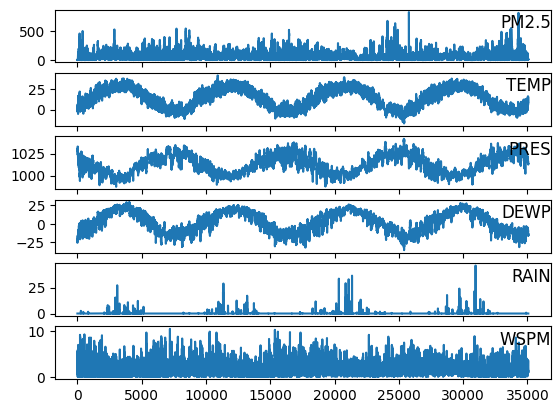

In [6]:
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3,  4, 6]
i = 1
# plot each column
pyplot.figure()
for group in groups:
  pyplot.subplot(len(groups), 1, i)
  #print("i: " + str(i) + ", " + str(values[:,group]))
  pyplot.plot(values[:, group])
  pyplot.title(dataset.columns[group], y=0.5, loc='right')
  i += 1
pyplot.show()

In [7]:
# Multivariate LSTM Forecast Model
# Problem: predicting the pollution at the current hour (t) given the pollution measurement and weather conditions at the prior time step

# The wind direction feature is label encoded (integer encoded). This could further be one-hot encoded in the future if you are interested in exploring it
# Next, all features are normalized, then the dataset is transformed into a supervised learning problem. The weather variables for the hour to be predicted (t) are then removed.
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
 
	# input sequence (t-n, ... t-1)
	# n_in is the number of hours as input
	for i in range(n_in, 0, -1):

		# grab row of data and appent to col
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

	# forecast sequence (t, t+1, ... t+n)
	# n_out is the number of PM we want to predict
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	
		# drop columns we don't want to predict
		# drop next hour stats for meteorological keep PM data
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# drop columns we don't want to predict
# drop next hour stats for meteorological keep PM data
def resize(df):
  drop_list = []
  for i in range((input*7), (input+output)*7, 1):
      if (i%7 != 0):
        drop_list.append(i)
  print(drop_list)
  df.drop(reframed.columns[drop_list], axis=1, inplace=True)

In [8]:
# Preprocessing
# integer encode direction
encoder = LabelEncoder()
values[:,5] = encoder.fit_transform(values[:,5])

#print(values[:,5])
# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
print(scaled.shape)
#print(scaled[:,5])


(35064, 7)


In [9]:

# input how many hours to use as input
# output how many hours to predict in future
input = 48
output = 6

# frame as supervised learning
reframed = series_to_supervised(scaled, input, output) # 48, 24
resize(reframed)
reframed.head()


# drop columns we don't want to predict
# drop next hour stats for meteorological keep PM data
# reframed.drop(reframed.columns[[8, 9,10,11,12,13]], axis=1, inplace=True)


[337, 338, 339, 340, 341, 342, 344, 345, 346, 347, 348, 349, 351, 352, 353, 354, 355, 356, 358, 359, 360, 361, 362, 363, 365, 366, 367, 368, 369, 370, 372, 373, 374, 375, 376, 377]


,var1(t-48),var2(t-48),var3(t-48),var4(t-48),var5(t-48),var6(t-48),var7(t-48),var1(t-47),var2(t-47),var3(t-47),...,var4(t-1),var5(t-1),var6(t-1),var7(t-1),var1(t),var1(t+1),var1(t+2),var1(t+3),var1(t+4),var1(t+5)
48,0.003787,0.281520,0.681238,0.216849,0.0,1.000000,0.542857,0.003787,0.278066,0.692167,...,0.324493,0.0,0.000000,0.000000,0.099130,0.100352,0.130911,0.133355,0.134578,0.099130
49,0.003787,0.278066,0.692167,0.205928,0.0,0.989247,0.371429,0.003787,0.269430,0.695810,...,0.351014,0.0,0.000000,0.000000,0.100352,0.130911,0.133355,0.134578,0.099130,0.090573
50,0.003787,0.269430,0.695810,0.166927,0.0,1.000000,0.504762,0.003787,0.265976,0.712202,...,0.343214,0.0,0.903226,0.066667,0.130911,0.133355,0.134578,0.099130,0.090573,0.085684
51,0.003787,0.265976,0.712202,0.152886,0.0,0.000000,0.466667,0.002564,0.257340,0.728596,...,0.343214,0.0,0.376344,0.123810,0.133355,0.134578,0.099130,0.090573,0.085684,0.086906
52,0.002564,0.257340,0.728596,0.168487,0.0,1.000000,0.304762,0.008676,0.248705,0.735884,...,0.355694,0.0,0.419355,0.114286,0.134578,0.099130,0.090573,0.085684,0.086906,0.106464


In [10]:
print(reframed.values)
print(reframed.shape)
#type(train)

[[0.00378661 0.28151986 0.6812382  ... 0.13335547 0.13457781 0.09912974]
 [0.00378661 0.27806562 0.6921673  ... 0.13457781 0.09912974 0.0905733 ]
 [0.00378661 0.26943004 0.6958103  ... 0.09912974 0.0905733  0.08568391]
 ...
 [0.03679    0.5215889  0.56830597 ... 0.02089948 0.00989835 0.01845478]
 [0.02456652 0.5129534  0.56830597 ... 0.00989835 0.01845478 0.01478774]
 [0.01967713 0.4939551  0.57559204 ... 0.01845478 0.01478774 0.01478774]]
(35011, 342)


In [11]:
# Define and Fit Model
# split into train and test sets
values = reframed.values
features = 7
n_train_hours = 365 * 24 * 3
# train 75 % / test 25 %
train = values[:n_train_hours, :]

# rest is test data
test = values[n_train_hours:, :]

# split into input and outputs
train_X, train_y = train[:, :input*features], train[:, input*features:]
test_X, test_y = test[:, :input*features], test[:, input*features:]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
# around 9k hours of training, 26k hours of testing

(26280, 1, 336) (26280, 6) (8731, 1, 336) (8731, 6)


In [12]:
from tensorflow import keras
from tensorflow.keras import layers


def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [13]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0.4,
    mlp_dropout=0.25,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(output)(x)
    return keras.Model(inputs, outputs)

2022-12-17 17:00:22.688691: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-17 17:00:22.688771: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-17 17:00:22.688827: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (cn1008): /proc/driver/nvidia/version does not exist
2022-12-17 17:00:22.689090: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
292/292 [==============================] - 46s 113ms/step - loss: 0.0854 - val_loss: 0.0515
Epoch 2/50
292/292 [==============================] - 32s 108ms/step - loss: 0.0636 - val_loss: 0.0507
Epoch 3/50
292/292 [==============================] - 33s 114ms/step - loss: 0.0593 - val_loss: 0.0523
Epoch 4/50
292/292 [==============================] - 46s 158ms/step - loss: 0.0570 - val_loss: 0.0468
Epoch 5/50
292/292 [==============================] - 46s 158ms/step - loss: 0.0548 - val_loss: 0.0485
Epoch 6/50
292/292 [==============================] - 46s 159ms/step - loss: 0.0537 - val_loss: 0.0479
Epoch 7/50
292/292 [==============================] - 46s 158ms/step - loss: 0.0528 - val_loss: 0.0514
Epoch 8/50
292/292 [==============================] - 46s 158ms/step - loss: 0.0524 - val_loss: 0.0495
Epoch 9/50
292/292 [==============================] - 46s 158ms/step - loss: 0.0516 - val_loss: 0.0450
Epoch 10/50
292/292 [==============================] - 46s 158ms/step - l

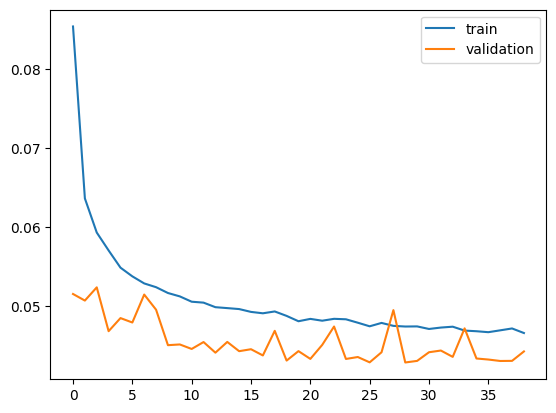

In [14]:
input_shape = train_X.shape[1:]
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 


model = build_model(
    input_shape,
    head_size=256,
    num_heads=8,
    ff_dim=4,
    num_transformer_blocks=8,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss=root_mean_squared_error,
    optimizer=keras.optimizers.Adam(learning_rate=1e-4)
)
#model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, \
    restore_best_weights=True)]

history = model.fit(
    train_X,
    train_y,
    validation_split=0.2,
    epochs=50,
    batch_size=72,
    callbacks=callbacks,
)

print("rmse on test")
model.evaluate(test_X, test_y, verbose=1)

# plot history for train/validation
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [15]:
model.save('TransformerV2_models_48_6/' + display_name + '.h5')

In [16]:
from math import sqrt
from numpy import concatenate
from sklearn.metrics import mean_squared_error

# Get prediction there can be multiple 
yhat = model.predict(test_X)
print(yhat.shape)

# rmse list
rmse_list = []

# this is just for inverse transform
test_X = test_X.reshape((test_X.shape[0], input*features))

to_save = np.zeros(shape=(yhat.shape[0], 1))


# calc rmse for every prediction
for i in range(yhat.shape[1]): # 24
  # invert scaling for forecast
  inv_yhat = concatenate((yhat[:, i:i+1], test_X[:, -(features-1):]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0] # save in a list append them all together
  
  inv_yhat_reshape = np.reshape(inv_yhat, (len(inv_yhat), 1))
  to_save = np.hstack((to_save, inv_yhat_reshape))

# now save predictions
    # wanshou (inv_yhat=pred)    
    # y x 24 x 12 average along rows


  # invert scaling for actual
  inv_y = concatenate((test_y[:, i:i+1], test_X[:, -(features-1):]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]

  rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
  rmse_list.append(rmse)

# calculate RMSE
avg_rmse = sum(rmse_list) / len(rmse_list)
print('Test RMSE: %.3f' % avg_rmse)

# 8713 x 24
to_save = to_save[:, 1:]
print(to_save.shape)
np.save('TransformerV2_pred6_np/' + display_name + "_np.npy", to_save)

273/273 [==============================] - 9s 31ms/step
(8731, 6)
Test RMSE: 37.728
(8731, 6)


In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt
import numpy as np
import pandas as pd
import os

file_list = ['PRSA_Wanshouxigong_numpy', 'PRSA_Wanliu_numpy', 'PRSA_Tiantan_numpy','PRSA_Shunyi_numpy','PRSA_Nongzhanguan_numpy','PRSA_Huairou_numpy','PRSA_Gucheng_numpy','PRSA_Guanyuan_numpy',
              'PRSA_Dongsi_numpy','PRSA_Dingling_numpy','PRSA_Changping_numpy','PRSA_Aotizhongxin_numpy']

pred_list = ['PRSA_Wanshouxigong_np', 'PRSA_Wanliu_np', 'PRSA_Tiantan_np','PRSA_Shunyi_np','PRSA_Nongzhanguan_np','PRSA_Huairou_np','PRSA_Gucheng_np','PRSA_Guanyuan_np',
              'PRSA_Dongsi_np','PRSA_Dingling_np','PRSA_Changping_np','PRSA_Aotizhongxin_np']

def average_adiag(x):
    x1d = [np.mean(x[::-1, :].diagonal(i)) for i in
           range(-x.shape[0] + 1, x.shape[1])]
    return np.array(x1d)

mae_list = []
rmse_list = []
r2_list = []

# 26328 index i need
for index in range(len(file_list)):
    #1 import the data

    np_folder = 'PRSA_preprocess/' + file_list[index]
    np_split = np_folder.split('/')
    np_file = np_split[1]
    splitter = np_file.split('_')
    display_name = splitter[0] + '_' + splitter[1]
    data = np.load('PRSA_preprocess/' + np_file + '.npy', allow_pickle=True)

    dataset = pd.DataFrame(data)
    dataset.columns = ['No', 'year', 'month','day', 'hour','PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']
    dataset['PM2.5'].fillna(0, inplace=True)
    
    #2 get the test data
    PM = dataset['PM2.5'].values
    PM = PM[26328:]
    PM = np.array(PM)

    #3 get the prediction
    directory = "TransformerV2_pred6_np/" + pred_list[index]
    loaded_np = np.load(directory+ ".npy")
    
    pred = average_adiag(loaded_np)
    pred = pred.tolist()
    pred = np.array(pred)
    
    #4 get the metrics
    print("Station: ", pred_list[index][:-3])
    mae = mean_absolute_error(PM, pred)
    mae_list.append(mae)
    print("MAE: " , mae)
    
    rmse = sqrt(mean_squared_error(PM, pred))
    rmse_list.append(rmse)
    print("RMSE: " , rmse)
    
    r2 = r2_score(PM, pred)
    r2_list.append(r2)
    print("R2: " , r2)
    print("")
avg_mae = sum(mae_list) / len(mae_list)
avg_rmse = sum(rmse_list) / len(rmse_list)
avg_r2 = sum(r2_list) / len(r2_list)
print("mae avg: ", avg_mae)
print("rmse avg: ", avg_rmse)
print("r2 avg: ", avg_r2)

Station:  PRSA_Wanshouxigong
MAE:  24.5456307798953
RMSE:  39.757500721617006
R2:  0.8035561097002543

Station:  PRSA_Wanliu
MAE:  23.54589130345939
RMSE:  37.89232763779914
R2:  0.7834445996079986

Station:  PRSA_Tiantan
MAE:  21.287775085049788
RMSE:  33.860830412607086
R2:  0.8318029554007431

Station:  PRSA_Shunyi
MAE:  22.047467305191592
RMSE:  36.03256125119443
R2:  0.812977707368278

Station:  PRSA_Nongzhanguan
MAE:  23.61615367777835
RMSE:  38.82755061226851
R2:  0.8009148010230381

Station:  PRSA_Huairou
MAE:  17.635590285714585
RMSE:  30.382129387958148
R2:  0.8125199723254075

Station:  PRSA_Gucheng
MAE:  24.87802073537915
RMSE:  40.18050867507657
R2:  0.7926655198415622

Station:  PRSA_Guanyuan
MAE:  22.481975307510762
RMSE:  35.64008483527249
R2:  0.8212593362462077

Station:  PRSA_Dongsi
MAE:  23.779621074623922
RMSE:  39.3064074242583
R2:  0.8081953956299148

Station:  PRSA_Dingling
MAE:  19.039780515912057
RMSE:  31.247189664348568
R2:  0.8101045074034635

Station:  PRS

In [9]:
#3 get the prediction
import numpy as np
def average_adiag(x):
    x1d = [np.mean(x[::-1, :].diagonal(i)) for i in
           range(-x.shape[0] + 1, x.shape[1])]
    return np.array(x1d)

directory = "TransformerV2_pred_np/" + 'PRSA_Wanshouxigong_np'
loaded_np = np.load(directory+ ".npy")
loaded_np.shape

pred = average_adiag(loaded_np)
pred = pred.tolist()
len(pred)

8736

In [10]:
import pandas as pd

np_folder = 'PRSA_preprocess/' + 'PRSA_Wanshouxigong_numpy'
np_split = np_folder.split('/')
np_file = np_split[1]
splitter = np_file.split('_')
display_name = splitter[0] + '_' + splitter[1]
hi = np.load('PRSA_preprocess/' + np_file + '.npy', allow_pickle=True)

dataframe = pd.DataFrame(hi)
dataframe.columns = ['No', 'year', 'month','day', 'hour','PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']
dataframe.to_csv(display_name + '.csv', index=False) # comma separated
dataframe['PM2.5'].fillna(0, inplace=True)

PM = dataframe['PM2.5'].values
PM = PM[26328:]
PM = np.array(PM)

# get the last 8731 values
len(PM)

8736

In [13]:
PM

array([191.0, 219.0, 213.0, ..., 14.0, 12.0, 13.0], dtype=object)

In [27]:
test = dataframe["PM2.5"].values
test = test[26280:]
len(test)

8784

In [3]:
import numpy as np
import pandas as pd
import os

directory = "TransformerV2_pred_np"
cnt = 0

for filename in os.listdir(os.path.join(os.getcwd(), directory)):
    if cnt == 0:

        loaded_np = np.load(directory + '/' + filename)
        loaded_np = np.reshape(loaded_np, (1, loaded_np.shape[0], loaded_np.shape[1]))
        cnt += 1
    else:
        big_np = np.load(directory + '/'  + filename)
        big_np = np.reshape(big_np, (1, big_np.shape[0], big_np.shape[1]))

        # 12 x 8713 x 24 
        loaded_np = np.concatenate((loaded_np, big_np), axis=0)
        cnt += 1
        
print(loaded_np.shape)

1
2
3
4
5
6
7
8
9
10
11
(12, 8713, 24)


In [17]:
# from math import sqrt
# from numpy import concatenate
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import r2_score

# # Get prediction there can be multiple 
# yhat = model.predict(test_X)

# # metric list of the prediction
# rmse_list = []
# mae_list = []
# r2_list = []

# # this is just for inverse transform
# test_X = test_X.reshape((test_X.shape[0], input*features))

# # calc rmse for every prediction
# for i in range(yhat.shape[1]):
#   # invert scaling for forecast
#   inv_yhat = concatenate((yhat[:, i:i+1], test_X[:, -(features-1):]), axis=1)
#   inv_yhat = scaler.inverse_transform(inv_yhat)
#   inv_yhat = inv_yhat[:,0]

#   # invert scaling for actual
#   inv_y = concatenate((test_y[:, i:i+1], test_X[:, -(features-1):]), axis=1)
#   inv_y = scaler.inverse_transform(inv_y)
#   inv_y = inv_y[:,0]

#   # rmse
#   rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
#   rmse_list.append(rmse)

#   # mae
#   mae = mean_absolute_error(inv_y, inv_yhat)
#   mae_list.append(mae)

#   # r2
#   r2 = r2_score(inv_y, inv_yhat)
#   r2_list.append(r2)

# # https://analyticsindiamag.com/a-guide-to-different-evaluation-metrics-for-time-series-forecasting-models/

# # calculate RMSE
# # rmse on each prediction
# print("Test rmse list: ", rmse_list)

# avg_rmse = sum(rmse_list) / len(rmse_list)
# print('Test avg RMSE: %.3f\n' % avg_rmse)

# # calculate MAE
# print("Test MAE list: ", mae_list)

# avg_mae = sum(mae_list) / len(mae_list)
# print('Test avg mae: %.3f\n' % avg_mae)

# # calculate R2 score
# print("Test r2 list: ", r2_list)
# avg_r2 = sum(r2_list) / len(r2_list)
# print('Test avg r2: %.3f' % avg_r2)

In [18]:
inv_yhat = yhat[:,0]
print(inv_yhat.shape)
a = np.reshape(inv_yhat, (len(inv_yhat), 1))
print(a.shape)
test = np.zeros(shape=(8713, 1))
print(test.shape)

b = np.hstack((test, a))
print(b.shape)
print(b)

b = b[:, 1:]
print(b.shape)
print(b)

print(to_save)

(8731,)
(8731, 1)
(8713, 1)


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 8713 and the array at index 1 has size 8731

In [ ]:
# model.save('LSTM_models_48_24/' + display_name + '.h5')

In [ ]:
# ensemble models together - for loop thorugh all models.predict(test_x) -> average all 12 outputs together

In [ ]:
# model = keras.models.load_model('LSTM_models_h5/PRSA_Aotizhongxin.h5', custom_objects={'root_mean_squared_error': root_mean_squared_error})

In [ ]:
# import os

# models = []

# directory = 'LSTM_models_h5'

# for filename in os.listdir(os.path.join(os.getcwd(), directory)):
#     modelTemp = keras.models.load_model('LSTM_models_h5/' + filename, custom_objects={'root_mean_squared_error': root_mean_squared_error})
#     modelTemp._name = filename[5:-3]
#     models.append(modelTemp)
#     print(filename[5:-3])
    
# print(len(models))